# Support Vector Machines 

## The Data


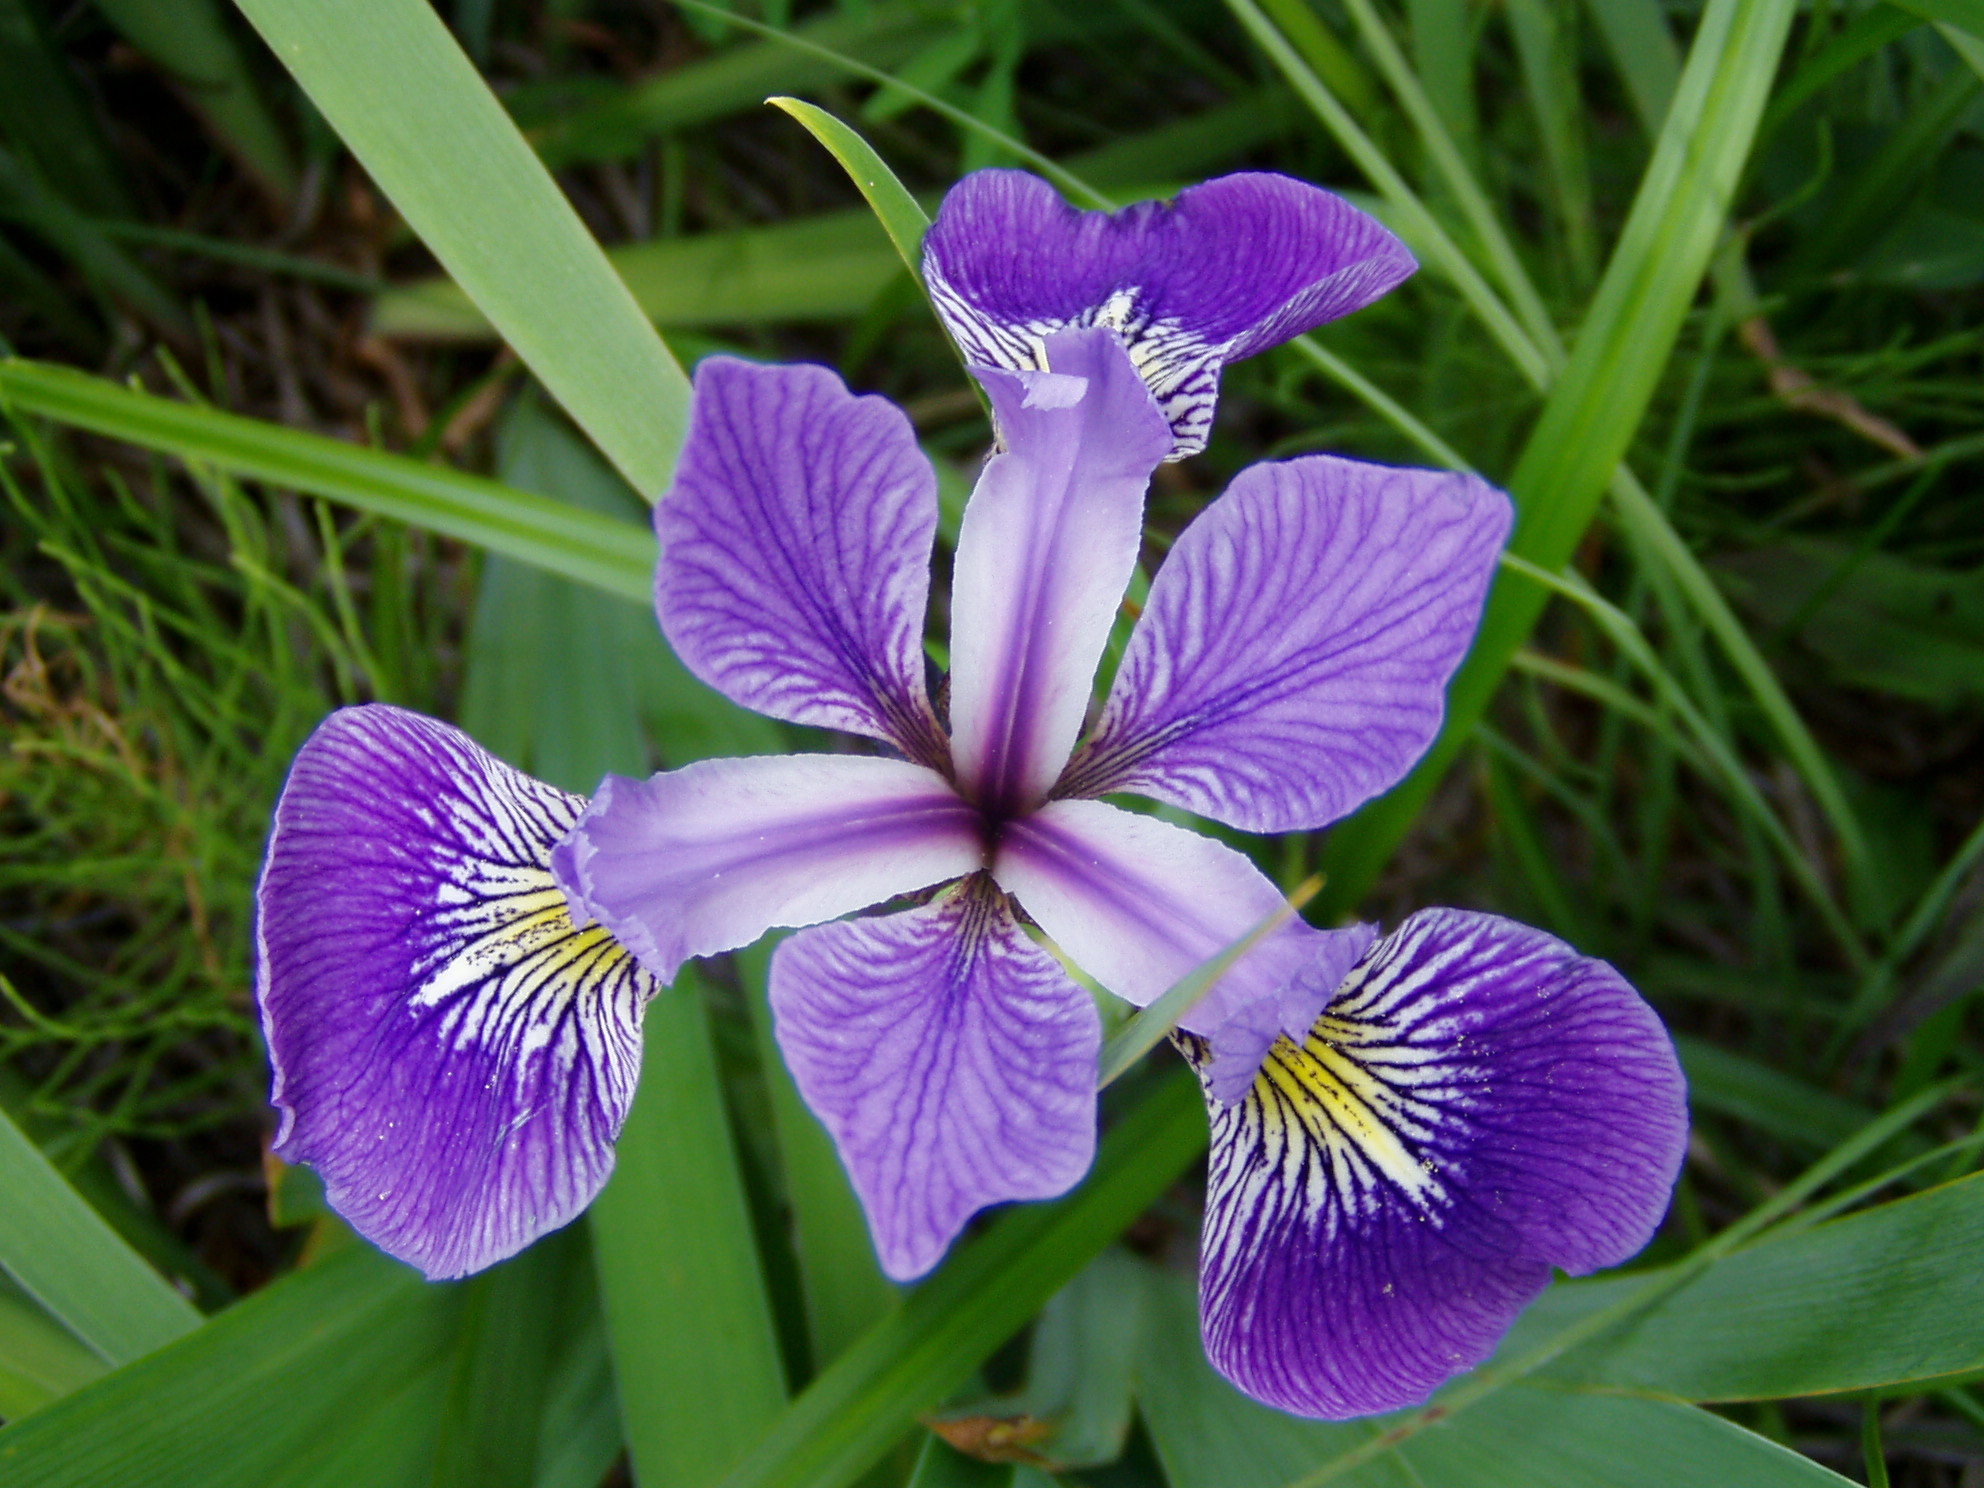

In [18]:
# The Iris Versicolor
from IPython.display import Image
url = 'http://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg'
Image(url,width=300, height=300)

The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset:

    Iris-setosa (n=50)
    Iris-versicolor (n=50)
    Iris-virginica (n=50)

The four features of the Iris dataset:

    sepal length in cm
    sepal width in cm
    petal length in cm
    petal width in cm

## Get the data

In [28]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report


In [6]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Exploratory Data Analysis

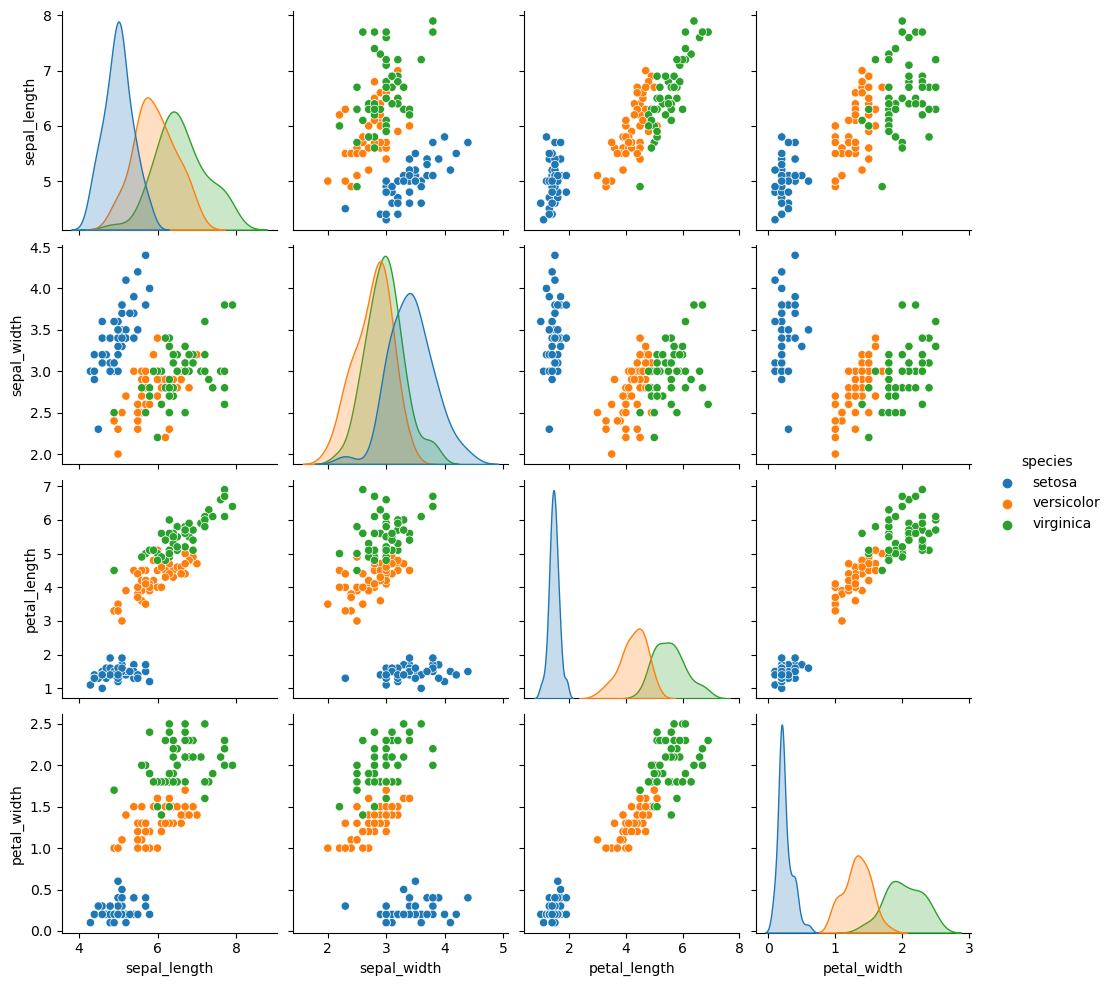

In [8]:
sns.pairplot(data= iris, hue = 'species');

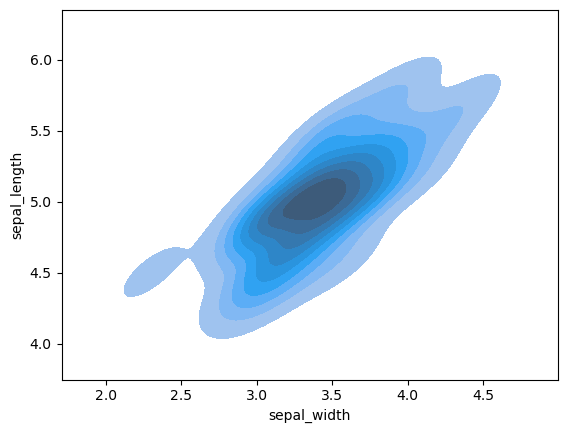

In [15]:
sns.kdeplot(data=iris[iris['species']=='setosa'], x = 'sepal_width', y = 'sepal_length', fill =True);

# Train Test Split


In [17]:
X = iris.drop('species', axis = 1)
y = iris['species']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Train a Model

In [20]:
svc = SVC()

In [21]:
svc.fit(X_train,y_train)

SVC()

## Model Evaluation


In [22]:
y_pred = svc.predict(X_test)

In [25]:
print(confusion_matrix( y_test, y_pred))

[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



## Gridsearch 

In [29]:
param_grid = {
            'C':[0.1,1,10,100],
            'gamma':[0.001,0.01,0.1]
}

In [30]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, refit=True, verbose=2)

In [31]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END .................................C=0.1, gamma=0.001; total time=   0.0s
[CV] END .................................C=0.1, gamma=0.001; total time=   0.0s
[CV] END .................................C=0.1, gamma=0.001; total time=   0.0s
[CV] END .................................C=0.1, gamma=0.001; total time=   0.0s
[CV] END .................................C=0.1, gamma=0.001; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1]},
             verbose=2)

In [32]:
grid_search.best_estimator_

SVC(C=100, gamma=0.01)

In [33]:
grid_search.best_params_

{'C': 100, 'gamma': 0.01}

In [35]:
grid_pred = grid_search.predict(X_test)

In [36]:
print(confusion_matrix( y_test, grid_pred))

[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]


In [37]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

